## STATISTICAL TESTS


In [107]:
import scipy.stats as stats
import pandas as pd

sample = pd.Series(stats.norm(loc=3.0, scale=1.4).rvs(1000))
sample.head()

0    1.657680
1    1.972668
2    2.594582
3    2.790499
4    3.002334
dtype: float64

In [108]:
sample.describe()

count    1000.000000
mean        3.029998
std         1.426956
min        -1.301778
25%         2.075558
50%         3.001525
75%         3.992656
max         7.312833
dtype: float64

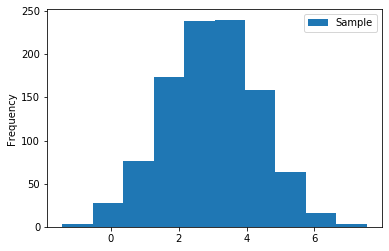

In [82]:
%matplotlib inline
sampleA.plot(kind="hist");

## T-Test

The form of play here is to practice generating data samples, including some that shouldn't register as different, and seeing if they do.

People who run the same T-Test over and over, until they get p < 0.05, may be falling into a pitfall, in not continuing those tests.  See what results you get here.

Beyond the T-test: ANOVA, Tukey, with Chi-Squared in there somewhere.

What we're looking for in all these cases is whether we really looking at a difference that makes a difference.  Are these two sets of data worth distinguishing?  What if we have more than two sets?

ANOVO is good at detecting the presence of outliers, without saying who they are.  Tukey is good at comparing the sets pairwise and deciding which pairs might have an above threshold difference, meaning a low probability of differing by chance.

In [5]:
from scipy.stats import ttest_ind
import numpy as np

In [8]:
before = np.random.normal(2.1, 0.9, 1000)
after  = np.random.normal(2.1, 0.7, 1000)

results = ttest_ind(before, after)

Like try the same $\mu$ for both, and just mess with the $\sigma$, by making the curve sharper.  Try plotting both.

Remember, a lot of these tests are pretty worthless if we can't assume a normal distrubution on the part of what our samples sample.  

The height of the barley plant needs to taper off symmetrically on both sides of some mean, with no equally salient peak somewhere else.

In [9]:
results

Ttest_indResult(statistic=-1.5089261115054415, pvalue=0.13147577439562574)

## F-Test

In [12]:
from statistics import variance
import scipy

sampleA = np.random.normal(1000, 100, 15)
sampleB = np.random.normal(1000, 110, 20)

F = variance(sampleA) / variance(sampleB)
df1 = len(sampleA) - 1
df2 = len(sampleB) - 1
survival = scipy.stats.f.sf(F, df1, df2)
pvalue   = scipy.stats.f.cdf(F, df1, df2)

In [13]:
survival

0.9665638778471609

In [14]:
pvalue

0.033436122152839094

In [16]:
alpha = 0.05
if pvalue < alpha:
    print("Reject the Null Hypothesis H0")
else:
    print("Accept the Null Hypothesis H0")

Reject the Null Hypothesis H0


## ANOVA

In [116]:
import scipy.stats as stats

sampleA = stats.norm(loc=3.0, scale=1.4).rvs(1000)
sampleB = stats.norm(loc=3.0, scale=1.4).rvs(1000)
sampleC = stats.norm(loc=3.1, scale=1.4).rvs(1000)

stats.f_oneway(sampleA, sampleB, sampleC)

F_onewayResult(statistic=3.58033974006941, pvalue=0.02798548434616102)

[Example Online Tutorial](https://towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad)

In [117]:
# ? stats.norm

## Tukey

## For Further Reading

Windish, Donna M, and Marie Diener-West. [“A clinician-educator's roadmap to choosing and interpreting statistical tests.”](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1924630/) Journal of general internal medicine vol. 21,6 (2006): 656-60. doi:10.1111/j.1525-1497.2006.00390.x